<a href="https://colab.research.google.com/github/jpiche0720/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Unit%201%20Build%20PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEDIAN HOUSE PRICE VS POPULATION GROWTH 

## Our begining data set

Zillow.com has recoreded the median sale price of homes in metropolitian statistical areas of the United States as early as 2008. The data for most cities is available as far back as 2010. 

**Start by reading the zillow dataset:**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
!wget http://files.zillowstatic.com/research/public/Metro/Sale_Prices_Msa.csv

--2020-02-07 22:24:18--  http://files.zillowstatic.com/research/public/Metro/Sale_Prices_Msa.csv
Resolving files.zillowstatic.com (files.zillowstatic.com)... 99.86.33.92, 99.86.33.94, 99.86.33.54, ...
Connecting to files.zillowstatic.com (files.zillowstatic.com)|99.86.33.92|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 497933 (486K) [binary/octet-stream]
Saving to: ‘Sale_Prices_Msa.csv’

Sale_Prices_Msa.csv 100%[===================>] 486.26K  --.-KB/s    in 0.03s   

2020-02-07 22:24:18 (14.8 MB/s) - ‘Sale_Prices_Msa.csv’ saved [497933/497933]



In [0]:
house_prices = pd.read_csv('Sale_Prices_Msa.csv')
print(house_prices.shape)
house_prices.head()

(625, 145)


,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,102001,United States,0,182900.0,179300.0,175300.0,172100.0,171100.0,170800.0,170000.0,168600.0,165800.0,162000.0,159700.0,158200.0,156700.0,152600.0,149100.0,148200.0,150100.0,152500.0,154300.0,155600.0,156700.0,157300.0,158700.0,159400.0,160200.0,157500.0,155200.0,152500.0,152800.0,153200.0,154700.0,154100.0,153700.0,152200.0,152600.0,151900.0,149300.0,...,197700.0,199400.0,201000.0,202000.0,203300.0,204000.0,205300.0,205100.0,205400.0,206000.0,207200.0,208200.0,210200.0,211400.0,213100.0,213400,216500,220600,224200,224100,221400,219800,219500,219800,219700,220500,222200,223300,226700,229500.0,232500.0,232100.0,231800.0,232300.0,233500.0,234500.0,235300.0,237200.0,239900.0,NaN
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362900.0,363000.0,362400.0,361800.0,...,365100.0,367600.0,366800.0,367600.0,362800.0,364200.0,364300.0,368500.0,370200.0,370500.0,371700.0,369200.0,370600.0,370100.0,374600.0,376400,378300,376800,377400,378300,380900,381800,383500,383600,384200,383100,383600,384800,387100,388400.0,388800.0,391100.0,392900.0,393900.0,395800.0,396700.0,399100.0,401600.0,407500.0,NaN
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,470900.0,459400.0,443500.0,432500.0,418100.0,405800.0,391200.0,379200.0,366800.0,355200.0,340900.0,331400.0,325300.0,319700.0,316500.0,322900.0,333000.0,341700.0,347900.0,353000.0,359900.0,362300.0,364800.0,362500.0,360900.0,357300.0,360300.0,358300.0,360600.0,356400.0,361000.0,358900.0,361200.0,356800.0,353000.0,351100.0,349500.0,...,531600.0,528500.0,526300.0,521700.0,524500.0,520800.0,524800.0,526900.0,534500.0,537100.0,538800.0,541200.0,547500.0,559600.0,577100.0,587400,594700,596900,602500,603200,604700,606900,609500,611400,614800,620600,626900,624900,625400,624500.0,631000.0,636000.0,633700.0,632200.0,634300.0,638600.0,643600.0,646000.0,651700.0,659600.0
3,394463,"Chicago, IL",3,253500.0,248700.0,232700.0,220900.0,218800.0,220200.0,224500.0,223800.0,217900.0,212900.0,206200.0,205400.0,201600.0,195500.0,186700.0,180800.0,182200.0,187000.0,190500.0,192700.0,192400.0,192000.0,192400.0,194600.0,192900.0,188700.0,181500.0,178800.0,174200.0,175500.0,173900.0,178300.0,177800.0,178700.0,176700.0,175200.0,170600.0,...,189300.0,190800.0,191100.0,194300.0,196200.0,200200.0,202900.0,203600.0,202500.0,199600.0,198200.0,198400.0,199800.0,201200.0,201400.0,203400,206100,211500,217600,219500,217100,215300,216200,217600,217800,219100,223300,219500,222100,226800.0,237700.0,238100.0,233700.0,227400.0,224900.0,224700.0,226700.0,229100.0,230900.0,231900.0
4,394514,"Dallas-Fort Worth, TX",4,146000.0,144100.0,142200.0,141600.0,143700.0,145800.0,145900.0,144200.0,142900.0,141100.0,141200.0,141300.0,141800.0,139800.0,140000.0,142000.0,145600.0,148100.0,148600.0,148200.0,146900.0,145500.0,145700.0,146000.0,147200.0,147400.0,145800.0,145800.0,146500.0,150600.0,152200.0,150800.0,149500.0,149500.0,152200.0,151400.0,147800.0,...,218500.0,221100.0,223800.0,224800.0,229000.0,232100.0,234300.0,233200.0,232300.0,232100.0,232100.0,233700.0,235800.0,238500.0,239500.0,241900,245800,249900,251400,249100,247100,246600,247600,246100,246000,245200,247000,247400,250600,251600.0,251900.0,250200.0,250500.0,251900.0,253300.0,255900.0,258100.0,261200.0,263800.0,NaN


#HOUSE PRICE DATA 
## MY MASTER SET:

0) Dallas-Fort Worth, TX

1) Phoenix, AZ

2) Denver, CO

3) Pittsburgh, PA

4) Los Angeles-Long Beach-Anaheim, CA

5) Baltimore, MD

6) Chicago, IL



###**Extract time series data spanning 2010 - 2018**

final set == sale_frame (340,98)


In [0]:
print(house_prices.shape)
house_prices.head(20)

In [0]:
small_frame = house_prices.iloc[:,25:122]
small_frame.head()

In [0]:
smaller_frame = house_prices['RegionName']
o = list([smaller_frame, small_frame])
frame = pd.concat(o,axis=1)
print(frame.shape)
frame.head()
frame.dropna(inplace=True)
sale_frame = frame.copy()

(625, 98)


In [0]:
print(sale_frame.shape)
sale_frame.head(20)

#POPULATION DATA FRAME
The US Census has provided an annual population estimates with many factors for 2010 - 2018. We will be using the total estimates of that year

**Extract population estimate columns**

**Separate MSA from counties**

find largest and smallest total growth locations

final data name = new_frame(383,13)

In [0]:
population = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2018/metro/totals/cbsa-est2018-alldata.csv', encoding='latin-1')

In [0]:
print(population.shape)
population.head()

In [0]:
columns = ['NAME','LSAD','CENSUS2010POP','POPESTIMATE2010','POPESTIMATE2011',
           'POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015',
           'POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018']

In [0]:
pop = population[columns]
print(pop.shape)
pop.head()

In [0]:
new_frame = pop[pop['LSAD']== 'Metropolitan Statistical Area']
print(new_frame.shape)
new_frame.iloc[20:30]

#Population Sizing

In [0]:
object0 = new_frame[new_frame['NAME']== 'Dallas-Fort Worth-Arlington, TX']
object1 = new_frame[new_frame['NAME']== 'Phoenix-Mesa-Scottsdale, AZ']
object2 = new_frame[new_frame['NAME']== 'Denver-Aurora-Lakewood, CO']
object3 = new_frame[new_frame['NAME']== 'Pittsburgh, PA']
object4 = new_frame[new_frame['NAME']== 'Los Angeles-Long Beach-Anaheim, CA']
object5 = new_frame[new_frame['NAME']== 'Baltimore-Columbia-Towson, MD']
object6 = new_frame[new_frame['NAME']== 'Chicago-Naperville-Elgin, IL-IN-WI']
object7 = new_frame[new_frame['NAME']== 'Cleveland-Elyria, OH']

dsets = list([object0,object1,object2,object3,object4,object5,object6])

newest_frame = pd.concat(dsets)

newest_frame.head(7)

In [0]:
print(newest_frame.shape)
newest_frame.head(7)

In [0]:
population_frame = newest_frame.reset_index()
population_final = population_frame.copy()

In [0]:
population_final.drop(columns= 'index',inplace=True)
population_finalest = population_final.copy()

In [0]:
print(population_finalest.shape)
population_finalest.head(7)

(7, 12)


,NAME,LSAD,CENSUS2010POP,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
0,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,6426214,6452028,6570598,6706434,6817518,6955259,7109280,7262951,7407944,7539711
1,"Phoenix-Mesa-Scottsdale, AZ",Metropolitan Statistical Area,4192887,4204738,4253825,4331053,4404675,4491423,4581122,4675966,4761694,4857962
2,"Denver-Aurora-Lakewood, CO",Metropolitan Statistical Area,2543482,2554816,2602973,2650456,2700774,2754641,2813514,2857549,2892979,2932415
3,"Pittsburgh, PA",Metropolitan Statistical Area,2356285,2357086,2360160,2360331,2359764,2356201,2347907,2340576,2330283,2324743
4,"Los Angeles-Long Beach-Anaheim, CA",Metropolitan Statistical Area,12828837,12838992,12927594,13018855,13106114,13178730,13250999,13291247,13298709,13291486
5,"Baltimore-Columbia-Towson, MD",Metropolitan Statistical Area,2710489,2715726,2733547,2754611,2768374,2780300,2790285,2794294,2798587,2802789
6,"Chicago-Naperville-Elgin, IL-IN-WI",Metropolitan Statistical Area,9461105,9470880,9500991,9529773,9553268,9564614,9557880,9540144,9520784,9498716


In [0]:
population_finalest.columns = ['NAME','LSAD','BASE','YR2010','YR2011','YR2012',
                               'YR2013','YR2014','YR2015','YR2016','YR2017',
                               'YR2018']

In [0]:
population_finalest.head(7)

,NAME,LSAD,BASE,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018
0,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,6426214,6452028,6570598,6706434,6817518,6955259,7109280,7262951,7407944,7539711
1,"Phoenix-Mesa-Scottsdale, AZ",Metropolitan Statistical Area,4192887,4204738,4253825,4331053,4404675,4491423,4581122,4675966,4761694,4857962
2,"Denver-Aurora-Lakewood, CO",Metropolitan Statistical Area,2543482,2554816,2602973,2650456,2700774,2754641,2813514,2857549,2892979,2932415
3,"Pittsburgh, PA",Metropolitan Statistical Area,2356285,2357086,2360160,2360331,2359764,2356201,2347907,2340576,2330283,2324743
4,"Los Angeles-Long Beach-Anaheim, CA",Metropolitan Statistical Area,12828837,12838992,12927594,13018855,13106114,13178730,13250999,13291247,13298709,13291486
5,"Baltimore-Columbia-Towson, MD",Metropolitan Statistical Area,2710489,2715726,2733547,2754611,2768374,2780300,2790285,2794294,2798587,2802789
6,"Chicago-Naperville-Elgin, IL-IN-WI",Metropolitan Statistical Area,9461105,9470880,9500991,9529773,9553268,9564614,9557880,9540144,9520784,9498716


# POPULATION Percent column

Final set = pop_final

In [0]:
import numpy as np

In [0]:
p_perc = population_finalest.copy()

In [0]:
nums = np.array(p_perc.iloc[0,3:]-p_perc.iloc[0,3])
row = np.array((nums/p_perc.iloc[0,3])*100)

nums = np.array(p_perc.iloc[1,3:]-p_perc.iloc[1,3])
row1 = np.array((nums/p_perc.iloc[1,3])*100)

nums = np.array(p_perc.iloc[2,3:]-p_perc.iloc[2,3])
row2 = np.array((nums/p_perc.iloc[2,3])*100)

nums = np.array(p_perc.iloc[3,3:]-p_perc.iloc[3,3])
row3 = np.array((nums/p_perc.iloc[3,3])*100)

nums = np.array(p_perc.iloc[4,3:]-p_perc.iloc[4,3])
row4 = np.array((nums/p_perc.iloc[4,3])*100)

nums = np.array(p_perc.iloc[5,3:]-p_perc.iloc[5,3])
row5 = np.array((nums/p_perc.iloc[5,3])*100)

nums = np.array(p_perc.iloc[6,3:]-p_perc.iloc[6,3])
row6 = np.array((nums/p_perc.iloc[6,3])*100)

p_perc_frame = pd.DataFrame({0:row,1:row1,2:row2,3:row3,4:row4,5:row5,6:row6})



In [0]:
obys = list([population_finalest,p_perc_frame.T])

pop_final = pd.concat(obys,axis=1)



In [0]:
pop_final.columns = ['NAME','LSAD','BASE','YR2010','YR2011','YR2012',
                     'YR2013','YR2014','YR2015','YR2016','YR2017',
                     'YR2018','PERC CHANGE0','1','2','3','4','5','6',
                     '7','8']

print(pop_final.shape)
pop_final.head(7)

(7, 21)


,NAME,LSAD,BASE,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,PERC CHANGE0,1,2,3,4,5,6,7,8
0,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,6426214,6452028,6570598,6706434,6817518,6955259,7109280,7262951,7407944,7539711,0,1.83772,3.94304,5.66473,7.79958,10.1868,12.5685,14.8157,16.858
1,"Phoenix-Mesa-Scottsdale, AZ",Metropolitan Statistical Area,4192887,4204738,4253825,4331053,4404675,4491423,4581122,4675966,4761694,4857962,0,1.16742,3.00411,4.75504,6.81814,8.95143,11.2071,13.2459,15.5354
2,"Denver-Aurora-Lakewood, CO",Metropolitan Statistical Area,2543482,2554816,2602973,2650456,2700774,2754641,2813514,2857549,2892979,2932415,0,1.88495,3.74352,5.71305,7.8215,10.1259,11.8495,13.2363,14.7799
3,"Pittsburgh, PA",Metropolitan Statistical Area,2356285,2357086,2360160,2360331,2359764,2356201,2347907,2340576,2330283,2324743,0,0.130415,0.13767,0.113615,-0.0375464,-0.389422,-0.700441,-1.13712,-1.37216
4,"Los Angeles-Long Beach-Anaheim, CA",Metropolitan Statistical Area,12828837,12838992,12927594,13018855,13106114,13178730,13250999,13291247,13298709,13291486,0,0.690101,1.40091,2.08055,2.64614,3.20903,3.52251,3.58063,3.52437
5,"Baltimore-Columbia-Towson, MD",Metropolitan Statistical Area,2710489,2715726,2733547,2754611,2768374,2780300,2790285,2794294,2798587,2802789,0,0.656215,1.43185,1.93863,2.37778,2.74545,2.89308,3.05115,3.20588
6,"Chicago-Naperville-Elgin, IL-IN-WI",Metropolitan Statistical Area,9461105,9470880,9500991,9529773,9553268,9564614,9557880,9540144,9520784,9498716,0,0.317932,0.621832,0.869909,0.989707,0.918605,0.731336,0.52692,0.293911


#Sizing SALES PRICE

**Reset index**

final datset = sales_finalest(7,98)

In [0]:
one1 = sale_frame[sale_frame['RegionName']== 'Dallas-Fort Worth, TX'] 
two2 = sale_frame[sale_frame['RegionName']== 'Phoenix, AZ'] 
thr3 = sale_frame[sale_frame['RegionName']== 'Denver, CO'] 
four4 = sale_frame[sale_frame['RegionName']== 'Pittsburgh, PA']
five5 = sale_frame[sale_frame['RegionName']== 'Los Angeles-Long Beach-Anaheim, CA'] 
six6 = sale_frame[sale_frame['RegionName']== 'Baltimore, MD'] 
sev7 = sale_frame[sale_frame['RegionName']== 'Chicago, IL']

objects = (one1,two2,thr3,four4,five5,six6,sev7)
final_sale_frame = pd.concat(objects)
final_sale_frame.head(7)

In [0]:

sales_final = final_sale_frame.reset_index()
sales_final.drop(columns='index',inplace=True)
sales_finalest = sales_final.copy()


In [0]:
print(sales_finalest.shape)
sales_finalest.head(7)

# Sale price percent change column

final = s_perc_frame

In [0]:
sales_finalest.head()

In [0]:
sales_years = pd.DataFrame([sales_finalest.iloc[:,1], sales_finalest.iloc[:,13],
                            sales_finalest.iloc[:,25], sales_finalest.iloc[:,37],
                            sales_finalest.iloc[:,-49], sales_finalest.iloc[:,-37], 
                            sales_finalest.iloc[:,-25], sales_finalest.iloc[:,-13],
                            sales_finalest.iloc[:,-1]])

price_df = sales_years.T
price_df

,2010-01,2011-01,2012-01,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01
0,145700.0,152200.0,150700.0,164000.0,177600.0,192700.0,205500.0,229000.0,245800.0
1,129000.0,113000.0,114000.0,139700.0,155700.0,162500.0,184700.0,203900.0,224300.0
2,200600.0,203000.0,203700.0,231800.0,248800.0,275500.0,309700.0,342700.0,375100.0
3,105100.0,105100.0,109000.0,118700.0,117400.0,125800.0,129900.0,134000.0,137400.0
4,364800.0,353000.0,331800.0,390800.0,450000.0,476200.0,515100.0,524500.0,594700.0
5,224100.0,207400.0,215800.0,224600.0,226000.0,228600.0,227400.0,232900.0,240500.0
6,192400.0,176700.0,153300.0,158200.0,181400.0,191200.0,179700.0,196200.0,206100.0


In [0]:
nums = np.array(price_df.iloc[0,0:]-price_df.iloc[0,0])
row = np.array((nums/price_df.iloc[0,1])*100)

nums = np.array(price_df.iloc[1,0:]-price_df.iloc[1,0])
row1 = np.array((nums/price_df.iloc[1,1])*100)

nums = np.array(price_df.iloc[2,0:]-price_df.iloc[2,0])
row2 = np.array((nums/price_df.iloc[2,1])*100)

nums = np.array(price_df.iloc[3,0:]-price_df.iloc[3,0])
row3 = np.array((nums/price_df.iloc[3,1])*100)

nums = np.array(price_df.iloc[4,0:]-price_df.iloc[4,0])
row4 = np.array((nums/price_df.iloc[4,1])*100)

nums = np.array(price_df.iloc[5,0:]-price_df.iloc[5,0])
row5 = np.array((nums/price_df.iloc[5,1])*100)

nums = np.array(price_df.iloc[6,0:]-price_df.iloc[6,0])
row6 = np.array((nums/price_df.iloc[6,1])*100)

s_perc_frame = pd.DataFrame({0:row,1:row1,2:row2,3:row3,4:row4,5:row5,6:row6})

s_perc_frame.T





# CONCAT

In [0]:
datasets = (pop_final,sales_finalest, s_perc_frame.T)



In [0]:
finalest = pd.concat(datasets,axis=1)
finalest.head(7)

,NAME,LSAD,BASE,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,PERC CHANGE0,1,2,3,4,5,6,7,8,RegionName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,0,1,2,3,4,5,6,7,8
0,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,6426214,6452028,6570598,6706434,6817518,6955259,7109280,7262951,7407944,7539711,0,1.83772,3.94304,5.66473,7.79958,10.1868,12.5685,14.8157,16.858,"Dallas-Fort Worth, TX",145700.0,146000.0,147200.0,147400.0,145800.0,145800.0,146500.0,150600.0,152200.0,150800.0,149500.0,149500.0,152200.0,151400.0,147800.0,142900.0,141300.0,142000.0,...,200500.0,201200.0,201900.0,202000.0,202500.0,203400.0,205500.0,207700.0,209400.0,209900.0,211400.0,213700.0,215200.0,216700.0,218500.0,221100.0,223800.0,224800.0,229000.0,232100.0,234300.0,233200.0,232300.0,232100.0,232100.0,233700.0,235800.0,238500.0,239500.0,241900,245800,0.0,4.270696,3.285151,12.023653,20.959264,30.880420,39.290407,54.730618,65.768725
1,"Phoenix-Mesa-Scottsdale, AZ",Metropolitan Statistical Area,4192887,4204738,4253825,4331053,4404675,4491423,4581122,4675966,4761694,4857962,0,1.16742,3.00411,4.75504,6.81814,8.95143,11.2071,13.2459,15.5354,"Phoenix, AZ",129000.0,128300.0,128600.0,127500.0,125100.0,124400.0,123800.0,121700.0,120500.0,118400.0,118200.0,113500.0,113000.0,110400.0,110900.0,108100.0,105600.0,105400.0,...,176400.0,176200.0,177300.0,179300.0,181700.0,183900.0,184700.0,185100.0,185900.0,188800.0,191500.0,192800.0,192700.0,194900.0,197300.0,199800.0,202400.0,201600.0,203900.0,203800.0,206400.0,205600.0,206300.0,207000.0,208600.0,210800.0,213000.0,215600.0,218900.0,219900,224300,0.0,-14.159292,-13.274336,9.469027,23.628319,29.646018,49.292035,66.283186,84.336283
2,"Denver-Aurora-Lakewood, CO",Metropolitan Statistical Area,2543482,2554816,2602973,2650456,2700774,2754641,2813514,2857549,2892979,2932415,0,1.88495,3.74352,5.71305,7.8215,10.1259,11.8495,13.2363,14.7799,"Denver, CO",200600.0,204100.0,202000.0,202800.0,199600.0,199700.0,203400.0,207300.0,211900.0,210300.0,207800.0,207600.0,203000.0,201100.0,196200.0,195700.0,194000.0,194900.0,...,291600.0,293400.0,295200.0,298800.0,302400.0,305900.0,309700.0,316600.0,319700.0,321000.0,320200.0,322500.0,328000.0,330000.0,332600.0,334600.0,337600.0,341100.0,342700.0,348800.0,349500.0,352900.0,349900.0,354000.0,354800.0,358600.0,361300.0,366100.0,368800.0,371900,375100,0.0,1.182266,1.527094,15.369458,23.743842,36.896552,53.743842,70.000000,85.960591
3,"Pittsburgh, PA",Metropolitan Statistical Area,2356285,2357086,2360160,2360331,2359764,2356201,2347907,2340576,2330283,2324743,0,0.130415,0.13767,0.113615,-0.0375464,-0.389422,-0.700441,-1.13712,-1.37216,"Pittsburgh, PA",105100.0,102700.0,104400.0,106500.0,109300.0,108200.0,104900.0,102800.0,103400.0,106400.0,107400.0,107200.0,105100.0,102500.0,102700.0,100800.0,104200.0,104600.0,...,126700.0,128500.0,128900.0,128300.0,127900.0,128400.0,129900.0,130000.0,128500.0,129100.0,129400.0,130700.0,130200.0,129600.0,129300.0,129600.0,130500.0,131600.0,134000.0,134500.0,135600.0,134100.0,135100.0,134800.0,135000.0,134600.0,134400.0,136100.0,138400.0,138000,137400,0.0,0.000000,3.710752,12.940057,11.703140,19.695528,23.596575,27.497621,30.732636
4,"Los Angeles-Long Beach-Anaheim, CA",Metropolitan Statistical Area,12828837,12838992,12927594,13018855,13106114,13178730,13250999,13291247,13298709,13291486,0,0.690101,1.40091,2.08055,2.64614,3.20903,3.52251,3.58063,3.52437,"Los Angeles-Long Beach-Anaheim, CA",364800.0,362500.0,360900.0,357300.0,360300.0,358300.0,360600.0,356400.0,361000.0,358900.0,361200.0,356800.0,353000.0,351100.0,349500.0,350300.0,346200.0,342600.0,...,495400.0,499900.0,499100.0,499100.0,500800.0

#FINAL FRAME

finalest (6,20)

In [0]:
finalest.head(7)

,NAME,LSAD,BASE,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,PERC CHANGE0,1,2,3,4,5,6,7,8,RegionName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,0,1,2,3,4,5,6,7,8
0,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,6426214,6452028,6570598,6706434,6817518,6955259,7109280,7262951,7407944,7539711,0,1.83772,3.94304,5.66473,7.79958,10.1868,12.5685,14.8157,16.858,"Dallas-Fort Worth, TX",145700.0,146000.0,147200.0,147400.0,145800.0,145800.0,146500.0,150600.0,152200.0,150800.0,149500.0,149500.0,152200.0,151400.0,147800.0,142900.0,141300.0,142000.0,...,200500.0,201200.0,201900.0,202000.0,202500.0,203400.0,205500.0,207700.0,209400.0,209900.0,211400.0,213700.0,215200.0,216700.0,218500.0,221100.0,223800.0,224800.0,229000.0,232100.0,234300.0,233200.0,232300.0,232100.0,232100.0,233700.0,235800.0,238500.0,239500.0,241900,245800,0.0,4.270696,3.285151,12.023653,20.959264,30.880420,39.290407,54.730618,65.768725
1,"Phoenix-Mesa-Scottsdale, AZ",Metropolitan Statistical Area,4192887,4204738,4253825,4331053,4404675,4491423,4581122,4675966,4761694,4857962,0,1.16742,3.00411,4.75504,6.81814,8.95143,11.2071,13.2459,15.5354,"Phoenix, AZ",129000.0,128300.0,128600.0,127500.0,125100.0,124400.0,123800.0,121700.0,120500.0,118400.0,118200.0,113500.0,113000.0,110400.0,110900.0,108100.0,105600.0,105400.0,...,176400.0,176200.0,177300.0,179300.0,181700.0,183900.0,184700.0,185100.0,185900.0,188800.0,191500.0,192800.0,192700.0,194900.0,197300.0,199800.0,202400.0,201600.0,203900.0,203800.0,206400.0,205600.0,206300.0,207000.0,208600.0,210800.0,213000.0,215600.0,218900.0,219900,224300,0.0,-14.159292,-13.274336,9.469027,23.628319,29.646018,49.292035,66.283186,84.336283
2,"Denver-Aurora-Lakewood, CO",Metropolitan Statistical Area,2543482,2554816,2602973,2650456,2700774,2754641,2813514,2857549,2892979,2932415,0,1.88495,3.74352,5.71305,7.8215,10.1259,11.8495,13.2363,14.7799,"Denver, CO",200600.0,204100.0,202000.0,202800.0,199600.0,199700.0,203400.0,207300.0,211900.0,210300.0,207800.0,207600.0,203000.0,201100.0,196200.0,195700.0,194000.0,194900.0,...,291600.0,293400.0,295200.0,298800.0,302400.0,305900.0,309700.0,316600.0,319700.0,321000.0,320200.0,322500.0,328000.0,330000.0,332600.0,334600.0,337600.0,341100.0,342700.0,348800.0,349500.0,352900.0,349900.0,354000.0,354800.0,358600.0,361300.0,366100.0,368800.0,371900,375100,0.0,1.182266,1.527094,15.369458,23.743842,36.896552,53.743842,70.000000,85.960591
3,"Pittsburgh, PA",Metropolitan Statistical Area,2356285,2357086,2360160,2360331,2359764,2356201,2347907,2340576,2330283,2324743,0,0.130415,0.13767,0.113615,-0.0375464,-0.389422,-0.700441,-1.13712,-1.37216,"Pittsburgh, PA",105100.0,102700.0,104400.0,106500.0,109300.0,108200.0,104900.0,102800.0,103400.0,106400.0,107400.0,107200.0,105100.0,102500.0,102700.0,100800.0,104200.0,104600.0,...,126700.0,128500.0,128900.0,128300.0,127900.0,128400.0,129900.0,130000.0,128500.0,129100.0,129400.0,130700.0,130200.0,129600.0,129300.0,129600.0,130500.0,131600.0,134000.0,134500.0,135600.0,134100.0,135100.0,134800.0,135000.0,134600.0,134400.0,136100.0,138400.0,138000,137400,0.0,0.000000,3.710752,12.940057,11.703140,19.695528,23.596575,27.497621,30.732636
4,"Los Angeles-Long Beach-Anaheim, CA",Metropolitan Statistical Area,12828837,12838992,12927594,13018855,13106114,13178730,13250999,13291247,13298709,13291486,0,0.690101,1.40091,2.08055,2.64614,3.20903,3.52251,3.58063,3.52437,"Los Angeles-Long Beach-Anaheim, CA",364800.0,362500.0,360900.0,357300.0,360300.0,358300.0,360600.0,356400.0,361000.0,358900.0,361200.0,356800.0,353000.0,351100.0,349500.0,350300.0,346200.0,342600.0,...,495400.0,499900.0,499100.0,499100.0,500800.0

# Run both cells for each graph 

#Dallas, TX

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



In [0]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', 
         '2016', '2017', '2018']

p = np.array(finalest.iloc[0,12:21])
s = np.array(finalest.iloc[0,-9:])

data = {'Year': years, 'Median House Price': s, 'Population Estimate': p}

df = pd.DataFrame(data)

df

,Year,Median House Price,Population Estimate
0,2010,0,0
1,2011,4.2707,1.83772
2,2012,3.28515,3.94304
3,2013,12.0237,5.66473
4,2014,20.9593,7.79958
5,2015,30.8804,10.1868
6,2016,39.2904,12.5685
7,2017,54.7306,14.8157
8,2018,65.7687,16.858


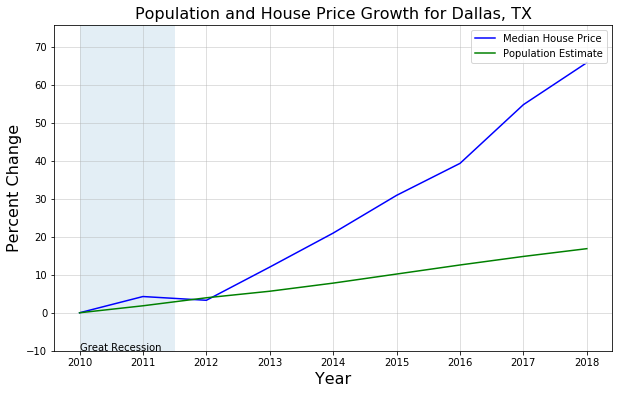

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax.grid(alpha=0.5)

low = (df['Median House Price'].min())-10
high = (df['Median House Price'].max())+10

ax.set_title('Population and House Price Growth for Dallas, TX', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Percent Change', fontsize=16)
ax.set_ylim(low,high)

plt.plot('Year','Median House Price',data = df,color='b')
plt.plot('Year','Population Estimate',data=df,color='g')

ax.legend(['Median House Price','Population Estimate'])
x = [0, 1.5]
y1 = [100, 100]
y2 = [-100, -100]

plt.fill_between(x, y1, y2,alpha=.12)

plt.annotate(s='Great Recession',xy=(0,low))

plt.show()

# Phoenix, AZ

In [0]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', 
         '2016', '2017', '2018']

p = np.array(finalest.iloc[1,12:21])
s = np.array(finalest.iloc[1,-9:])

data = {'Year': years, 'Median House Price': s, 'Population Estimate': p}

df = pd.DataFrame(data)

df

,Year,Median House Price,Population Estimate
0,2010,0,0
1,2011,-14.1593,1.16742
2,2012,-13.2743,3.00411
3,2013,9.46903,4.75504
4,2014,23.6283,6.81814
5,2015,29.646,8.95143
6,2016,49.292,11.2071
7,2017,66.2832,13.2459
8,2018,84.3363,15.5354


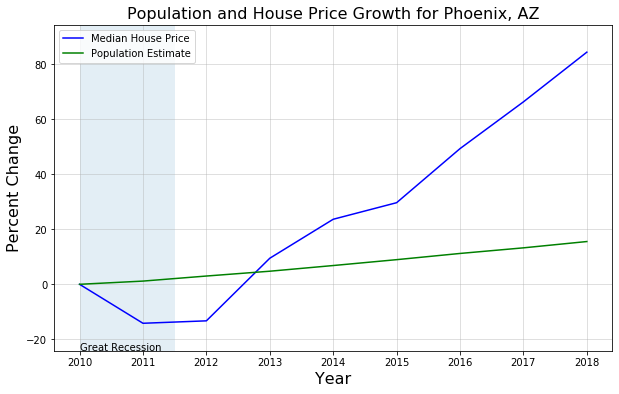

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax.grid(alpha=0.5)

low = (df['Median House Price'].min())-10
high = (df['Median House Price'].max())+10

ax.set_title('Population and House Price Growth for Phoenix, AZ', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Percent Change', fontsize=16)
ax.set_ylim(low,high)

plt.plot('Year','Median House Price',data = df,color='b')
plt.plot('Year','Population Estimate',data=df,color='g')

ax.legend(['Median House Price','Population Estimate'])
x = [0, 1.5]
y1 = [100, 100]
y2 = [-100, -100]

plt.fill_between(x, y1, y2,alpha=.12)

plt.annotate(s='Great Recession',xy=(0,low))

plt.show()

# Denver, CO

In [0]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', 
         '2016', '2017', '2018']

p = np.array(finalest.iloc[2,12:21])
s = np.array(finalest.iloc[2,-9:])

data = {'Year': years, 'Median House Price': s, 'Population Estimate': p}

df = pd.DataFrame(data)

df

,Year,Median House Price,Population Estimate
0,2010,0,0
1,2011,1.18227,1.88495
2,2012,1.52709,3.74352
3,2013,15.3695,5.71305
4,2014,23.7438,7.8215
5,2015,36.8966,10.1259
6,2016,53.7438,11.8495
7,2017,70,13.2363
8,2018,85.9606,14.7799


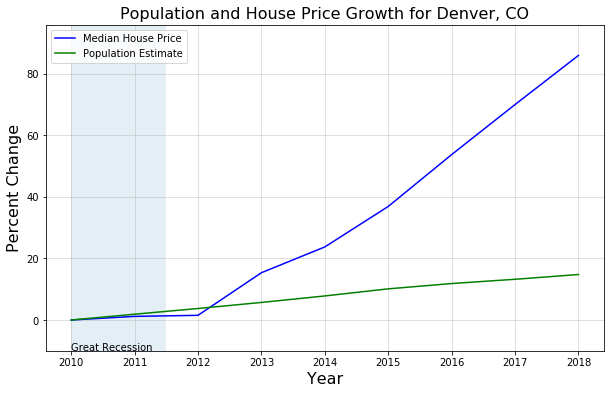

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax.grid(alpha=0.5)

low = (df['Median House Price'].min())-10
high = (df['Median House Price'].max())+10

ax.set_title('Population and House Price Growth for Denver, CO', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Percent Change', fontsize=16)
ax.set_ylim(low,high)

plt.plot('Year','Median House Price',data = df,color='b')
plt.plot('Year','Population Estimate',data=df,color='g')

ax.legend(['Median House Price','Population Estimate'])
x = [0, 1.5]
y1 = [100, 100]
y2 = [-100, -100]

plt.fill_between(x, y1, y2,alpha=.12)

plt.annotate(s='Great Recession',xy=(0,low))

plt.show()

#Pittsburgh, PA

In [0]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', 
         '2016', '2017', '2018']

p = np.array(finalest.iloc[3,12:21])
s = np.array(finalest.iloc[3,-9:])

data = {'Year': years, 'Median House Price': s, 'Population Estimate': p}

df = pd.DataFrame(data)

df

,Year,Median House Price,Population Estimate
0,2010,0,0
1,2011,0,0.130415
2,2012,3.71075,0.13767
3,2013,12.9401,0.113615
4,2014,11.7031,-0.0375464
5,2015,19.6955,-0.389422
6,2016,23.5966,-0.700441
7,2017,27.4976,-1.13712
8,2018,30.7326,-1.37216


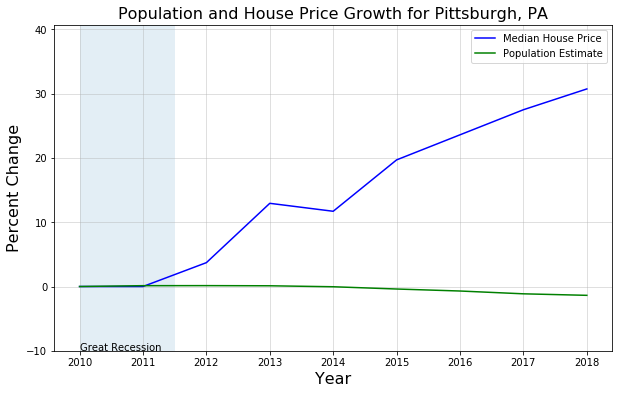

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax.grid(alpha=0.5)

low = (df['Median House Price'].min())-10
high = (df['Median House Price'].max())+10

ax.set_title('Population and House Price Growth for Pittsburgh, PA', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Percent Change', fontsize=16)
ax.set_ylim(low,high)

plt.plot('Year','Median House Price',data = df,color='b')
plt.plot('Year','Population Estimate',data=df,color='g')

ax.legend(['Median House Price','Population Estimate'])
x = [0, 1.5]
y1 = [100, 100]
y2 = [-100, -100]

plt.fill_between(x, y1, y2,alpha=.12)

plt.annotate(s='Great Recession',xy=(0,low))

plt.show()

#Los Angeles, CA

In [0]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', 
         '2016', '2017', '2018']

p = np.array(finalest.iloc[4,12:21])
s = np.array(finalest.iloc[4,-9:])

data = {'Year': years, 'Median House Price': s, 'Population Estimate': p}

df = pd.DataFrame(data)

df

,Year,Median House Price,Population Estimate
0,2010,0,0
1,2011,-3.34278,0.690101
2,2012,-9.34844,1.40091
3,2013,7.36544,2.08055
4,2014,24.136,2.64614
5,2015,31.5581,3.20903
6,2016,42.5779,3.52251
7,2017,45.2408,3.58063
8,2018,65.1275,3.52437


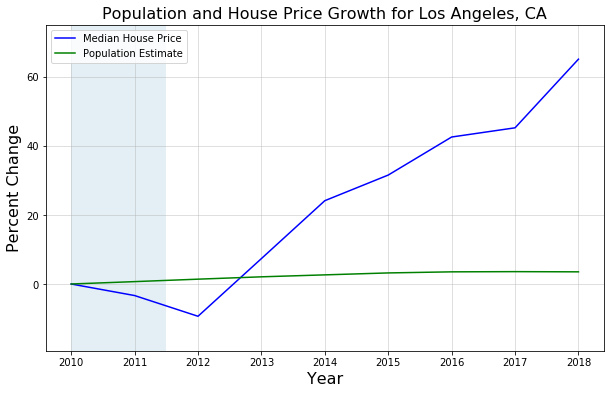

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax.grid(alpha=0.5)

low = (df['Median House Price'].min())-10
high = (df['Median House Price'].max())+10

ax.set_title('Population and House Price Growth for Los Angeles, CA', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Percent Change', fontsize=16)
ax.set_ylim(low,high)

plt.plot('Year','Median House Price',data = df,color='b')
plt.plot('Year','Population Estimate',data=df,color='g')

ax.legend(['Median House Price','Population Estimate'])
x = [0, 1.5]
y1 = [100, 100]
y2 = [-100, -100]

plt.fill_between(x, y1, y2,alpha=.12)



plt.show()

# Baltimore, MD

In [0]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', 
         '2016', '2017', '2018']

p = np.array(finalest.iloc[5,12:21])
s = np.array(finalest.iloc[5,-9:])

data = {'Year': years, 'Median House Price': s, 'Population Estimate': p}

df = pd.DataFrame(data)

df

,Year,Median House Price,Population Estimate
0,2010,0,0
1,2011,-8.05207,0.656215
2,2012,-4.00193,1.43185
3,2013,0.24108,1.93863
4,2014,0.916104,2.37778
5,2015,2.16972,2.74545
6,2016,1.59113,2.89308
7,2017,4.24301,3.05115
8,2018,7.90743,3.20588


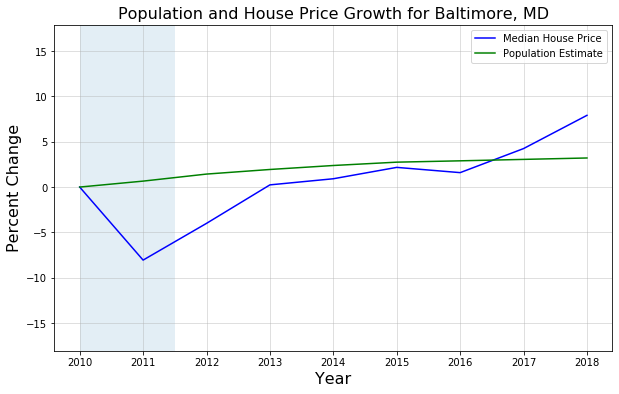

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax.grid(alpha=0.5)

low = (df['Median House Price'].min())-10
high = (df['Median House Price'].max())+10

ax.set_title('Population and House Price Growth for Baltimore, MD', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Percent Change', fontsize=16)
ax.set_ylim(low,high)

plt.plot('Year','Median House Price',data = df,color='b')
plt.plot('Year','Population Estimate',data=df,color='g')

ax.legend(['Median House Price','Population Estimate'])
x = [0, 1.5]
y1 = [100, 100]
y2 = [-100, -100]

plt.fill_between(x, y1, y2,alpha=.12)



plt.show()

#Chicago, IL

In [0]:
years = ['2010', '2011', '2012', '2013', '2014', '2015', 
         '2016', '2017', '2018']

p = np.array(finalest.iloc[6,12:21])
s = np.array(finalest.iloc[6,-9:])

data = {'Year': years, 'Median House Price': s, 'Population Estimate': p}

df = pd.DataFrame(data)

df

,Year,Median House Price,Population Estimate
0,2010,0,0
1,2011,-8.88512,0.317932
2,2012,-22.1279,0.621832
3,2013,-19.3548,0.869909
4,2014,-6.22524,0.989707
5,2015,-0.679117,0.918605
6,2016,-7.18732,0.731336
7,2017,2.15054,0.52692
8,2018,7.75325,0.293911


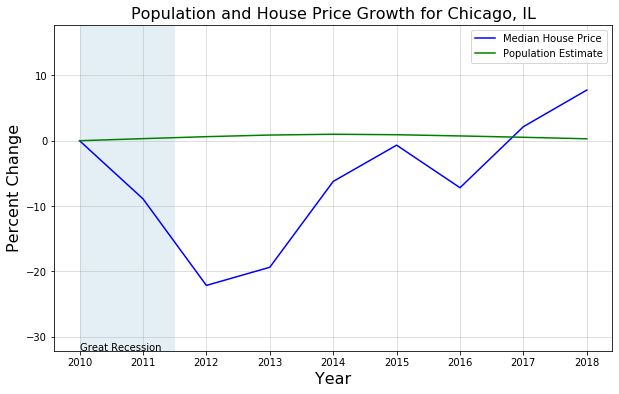

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax.grid(alpha=0.5)

low = (df['Median House Price'].min())-10
high = (df['Median House Price'].max())+10

ax.set_title('Population and House Price Growth for Chicago, IL', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Percent Change', fontsize=16)
ax.set_ylim(low,high)

plt.plot('Year','Median House Price',data = df,color='b')
plt.plot('Year','Population Estimate',data=df,color='g')

ax.legend(['Median House Price','Population Estimate'])
x = [0, 1.5]
y1 = [100, 100]
y2 = [-100, -100]

plt.fill_between(x, y1, y2,alpha=.12)

plt.annotate(s='Great Recession',xy=(0,low))

plt.show()